# Evaluating new pathway analysis method on Benchmark
This is a tutorial for evaluating a new pathway analysis method. We constructed the benchmark using 3 types of assays, where all raw data were curated from [ENCODE](https://www.encodeproject.org/). The following will explain how to evaluate your method with different assays.

## Evaluating methods on shRNA knockdown followed by RNA-seq

This is the major component for constructing the Benchmark. Raw read count from [K562](https://github.com/hedgehug/PET/blob/main/data/ENCODE_K562_RNA_seq_raw_count.zip) and [HepG2](https://github.com/hedgehug/PET/blob/main/data/ENCODE_HepG2_RNA_seq_raw_count.zip) were formatted into single data matrix with samples bearing shRNA knockdown and the corresponding control samples. Additionally, as ground truth pathways, we extracted the top 200 up and down-regulated DEGs (differentially expressed genes) after knockdown from ENCODE processed data. For example, [ENCODE_HepG2_RNA_up.gmt]() contains the top 200 up-regulated DEGs after each knockdown in HepG2 cell line, sorted by DESeq2 p-value. All the targets that's been knockdowned in two cell lines are matched. 

To evaluate new method on the RNA-seq, please run your method with the data matrix from one cell line against the pathway file (.gmt) from the other cell line, e.g. use [K562 raw read count](https://github.com/hedgehug/PET/blob/main/data/ENCODE_K562_RNA_seq_raw_count.zip) as input data matrix and [ENCODE_HepG2_RNA_down.gmt]() as target pathway. 

**Intuition**: in this realistic setting, we would expect to identify HepG2 G as No.1 pathway among all HepG2 pathways, when K562 G is the input data matrix, where G is a knockdown target in the expeirments.

We provided the resultsusing Fisher test, Enrichr, GSEA prerank and PET under best setting with expression data from [HepG2](https://github.com/hedgehug/PET/blob/main/data/ENCODE_HepG2_RNA_seq_raw_count.zip) and pathway file as [ENCODE_K562_RNA_down.gmt]().

Here we provide a toy example showing how the evaluation work.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 

random.seed(42)

all_target = np.loadtxt('data/ENCODE_HepG2_RNA_down.gmt', dtype=str, delimiter='\t')[:, 0]
# genrate a random matrix to represent the enrichment score/rank/any value of the new results.
rand_enrichment_score_mat = np.random.rand(len(all_target), len(all_target))
enrichment_score_df = pd.DataFrame(rand_enrichment_score_mat, index=all_target, columns=all_target)
# here, we suppose each column is an input matrix
# e.g. first column is HepG2 SNRNP200 data matrix and each tow represents a pathway from K562 KO DEGs
enrichment_score_df

,SNRNP200,DNAJC2,FXR1,HLTF,SART3,APOBEC3C,AKAP1,NPM1,PCBP2,PA2G4,...,AKAP8,DDX55,GPKOW,METAP2,HNRNPM,SUPV3L1,SMNDC1,SUB1,PRPF8,TAF15
SNRNP200,0.350943,0.273615,0.919984,0.241220,0.055816,0.123780,0.852003,0.931316,0.480501,0.134049,...,0.183691,0.500094,0.347698,0.865627,0.469987,0.183691,0.203617,0.957300,0.438743,0.001770
DNAJC2,0.249326,0.780936,0.921528,0.495795,0.762112,0.657113,0.152830,0.700034,0.548658,0.055196,...,0.067432,0.924510,0.665779,0.639208,0.371895,0.403732,0.731349,0.391731,0.238982,0.875814
FXR1,0.682293,0.784789,0.118550,0.949470,0.751363,0.941134,0.662548,0.599887,0.445951,0.484863,...,0.015941,0.097374,0.480227,0.712769,0.216577,0.554572,0.459563,0.263348,0.538722,0.367819
HLTF,0.646791,0.476617,0.961484,0.002825,0.925295,0.519619,0.659466,0.111351,0.016639,0.254099,...,0.750296,0.413259,0.353245,0.698764,0.854113,0.769912,0.241504,0.435600,0.145008,0.515763
SART3,0.891356,0.502154,0.152673,0.479138,0.004452,0.057141,0.672833,0.547459,0.673994,0.113646,...,0.299092,0.152069,0.397925,0.206063,0.314012,0.121345,0.192144,0.922170,0.030165,0.458253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPV3L1,0.538194,0.063587,0.329572,0.221626,0.343023,0.990546,0.276177,0.561503,0.363943,0.606534,...,0.855001,0.826542,0.945826,0.118171,0.955509,0.266564,0.852042,0.928333,0.975316,0.593278
SMNDC1,0.480646,0.886146,0.667543,0.543276,0.147819,0.903643,0.568413,0.498769,0.934940,0.420585,...,0.117852,0.783116,0.752685,0.648013,0.253312,0.117110,0.844041,0.144552,0.030393,0.253400
SUB1,0.432352,0.534669,0.559242,0.621029,0.327621,0.556717,0.499639,0.077516,0.928870,0.735475,...,0.998254,0.148775,0.194574,0.131459,0.160581,0.028625,0.308755,0.810971,0.039888,0.099494
PRPF8,0.858489,0.852129,0.594585,0.961759,0.048618,0.645833,0.556786,0.339959,0.373254,0.433731,...,0.369347,0.476487,0.738587,0.436412,0.408604,0.521476,0.734647,0.161476,0.688753,0.662154


In [10]:
# now calculate the rank for each input matrix, calculate the rank of the correspoding pathway in each row
# let the rank starts from 1
rank_list = []
for target in all_target:
    pathway_scores = enrichment_score_df[target]
    rank_list.append(np.where(pathway_scores.sort_values(ascending=False).index==target)[0][0]+1)    

In [14]:
# now load the benchmark result for Fisher exact test, Enrichr, GSEA and PET under best settings
# this contains the rank of expected pathway for these 3 methods
benchmark_result = pd.read_csv('data/Benchmark_results_RNA_seq.txt', header=0, delimiter='\t')
benchmark_result

,Fisher,Enrichr,GSEA,PET
0,3,8,3,1
1,2,26,6,1
2,47,9,13,6
3,1,28,1,1
4,1,2,1,1
...,...,...,...,...
192,13,2,2,1
193,6,10,20,2
194,1,16,1,1
195,26,10,19,6


<AxesSubplot:>

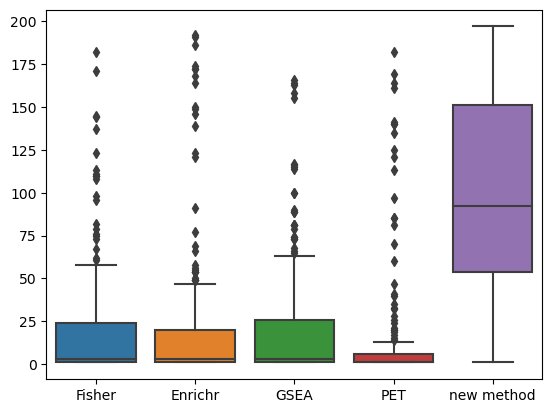

In [18]:
# add the new method result
benchmark_result['new method'] = rank_list

# plot the comparison
sns.boxplot(data=benchmark_result)

## Evaluating methods on eCLIP-seq
For eCLIP-seq, we curated the processed file, peak file in bed format, from ENCODE for both HepG2 and K562 cells. We annotated the peaks using [HOMER](http://homer.ucsd.edu/homer/ngs/annotation.html) to hg38. The raw and processed data is stored in [Figshare](https://figshare.com/projects/PET_benchmark/161938). Pathway files are provided in [data]((https://github.com/hedgehug/PET/blob/main/data/).

The eCLIP-seq can be treated as a ranked gene list with either signal value or p-value with peak file as the weights. We generated the pathway files based on sorting either signal value or p-value and preserve the genes with the strongest signal.

The evaluation process is smilar to RNA-seq. Where used could use the peak information from one cell line and target pathway from another cell line.

<AxesSubplot:>

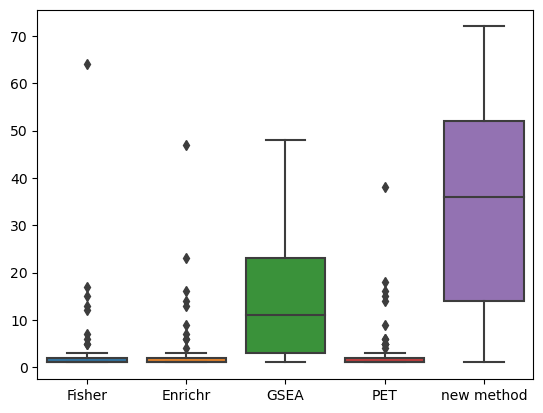

In [20]:
# here, we use the pval gmt as an example, similar evaluation could be done with signal gmt and result
all_target = np.loadtxt('data/ENCODE_HepG2_eCLIP_pval.gmt', dtype=str, delimiter='\t')[:, 0]

# genrate a random matrix to represent the enrichment score/rank/any value of the new results.
rand_enrichment_score_mat = np.random.rand(len(all_target), len(all_target))
enrichment_score_df = pd.DataFrame(rand_enrichment_score_mat, index=all_target, columns=all_target)

# calculate the rank for each input matrix, calculate the rank of the correspoding pathway in each row
# let the rank starts from 1
rank_list = []
for target in all_target:
    pathway_scores = enrichment_score_df[target]
    rank_list.append(np.where(pathway_scores.sort_values(ascending=False).index==target)[0][0]+1)    

# now load the benchmark result for Fisher exact test, Enrichr, GSEA and PET under best settings
# this contains the rank of expected pathway for these 3 methods
benchmark_result = pd.read_csv('data/Benchmark_results_eCLIP_seq_pval.txt', header=0, delimiter='\t')

# add the new method result
benchmark_result['new method'] = rank_list

# plot the comparison
sns.boxplot(data=benchmark_result)

## Evaluating methods on ChIP-seq
For ChIP-seq, we curated the processed file, peak file in bed format, from ENCODE for several cell lines. We annotated the peaks using [HOMER](http://homer.ucsd.edu/homer/ngs/annotation.html) to hg38. The raw and processed data is stored in [Figshare](https://figshare.com/projects/PET_benchmark/161938). Pathway files are provided in [data]((https://github.com/hedgehug/PET/blob/main/data/).

The ChIP-seq can be treated as a ranked gene list with either peak score or q-value with peak file as the weights. We generated the pathway files based on sorting either peak score or q-value and preserve the genes with the strongest signal.

Due to the imbalance of target number among different cell lines, for ChIP-seq evaluation, user could use **all the peak files** and run against **all target pathways**. If a target is present in multiple pathways, then the one with highest rank, based on method's criteria, should be taken into consideration.